# Collaboration and Competition

---
You can train the agent and then test it, or just test the pre-trained model. If so, jump to step 5.

# TRAINING

### 1. Start the Environment
We begin by importing the necessary packages. If the code cell below returns an error, please check that you have installed Unity ML-Agents and NumPy.

In [1]:
from unityagents import UnityEnvironment
import numpy as np


Let's start the environment!


### 2. Examine the State and Action Spaces

The environment here is populated by two agents playing a tennis-like game.

If an agent hits the ball over the net, it receives a reward of +0.1. If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01. Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Each agent receives its own, local observation. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping.

Every entry in the action vector is expected to be a number between -1 and 1.

Run the code cell below to print more details.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which animate the environment. Our brain of interest is the first one. Let's pick it!

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print more details about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Train the agents

Let's train the agent.
The training will stop if desired score or n_episodes (max) is reached. Each episode can last at most max_t steps.

In [ ]:
from cc_ddpg_agent import Agents
from collections import deque
import torch
import pickle

n_episodes=10000
max_t=1000
desired_score=0.5

agents = Agents(num_agents, state_size, action_size, 4109)

scores = []                        # list containing scores from each episode
scores_window = deque(maxlen=100)  # last 100 scores

for i_episode in range(1, n_episodes+1): 

    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    score = np.zeros(num_agents)                           # initialize the score (for each agent)

    for t in range(max_t):
        actions     = agents.act(states)                   # select an action (for each agent)
        env_info    = env.step(actions)[brain_name]        # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards     = env_info.rewards                     # get reward (for each agent)
        dones       = env_info.local_done                  # see if episode finished

        agents.step(states, actions, rewards, next_states, dones)
        
        states = next_states                               # roll over states to next time step
        score += env_info.rewards                          # update the score (for each agent)
        
        if np.any(dones):                                  # exit loop if episode finished
            break
     
    episode_score = np.max(score)             # pick the best score between the agents    
    scores_window.append(episode_score)       # save most recent episode score
    scores.append(episode_score)              # save most recent episode score
    print('\rEpisode {}\t Score: {}'.format(i_episode, score), end="")

    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score (of the winner agent): {:.9f}'.format(i_episode, np.mean(scores_window)))
    if np.mean(scores_window)>=desired_score:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.9f}'.format(i_episode-100, np.mean(scores_window)))
        torch.save(agents.actor_local.state_dict(),   'backup_actor_local.pth')
        torch.save(agents.actor_target.state_dict(),  'backup_actor_target.pth')
        torch.save(agents.critic_local.state_dict(),  'backup_critic_local.pth')
        torch.save(agents.critic_target.state_dict(), 'backup_critic_target.pth')
        with open("scores", 'wb') as f:
            pickle.dump(scores, f)    #saving also scores as backup
        break


Episode 100	Average Score (of the winner agent): 0.001900000
Episode 200	Average Score (of the winner agent): 0.001000000
Episode 300	Average Score (of the winner agent): 0.000000000
Episode 400	Average Score (of the winner agent): 0.006600000
Episode 500	Average Score (of the winner agent): 0.005700000
Episode 600	Average Score (of the winner agent): 0.000000000
Episode 700	Average Score (of the winner agent): 0.008000000
Episode 800	Average Score (of the winner agent): 0.013700000
Episode 900	Average Score (of the winner agent): 0.004700000
Episode 1000	Average Score (of the winner agent): 0.010300000
Episode 1100	Average Score (of the winner agent): 0.000000000
Episode 1200	Average Score (of the winner agent): 0.002800000
Episode 1300	Average Score (of the winner agent): 0.025500000
Episode 1400	Average Score (of the winner agent): 0.027600000
Episode 1500	Average Score (of the winner agent): 0.016800000
Episode 1600	Average Score (of the winner agent): 0.029800000
Episode 1700	Aver

When finished, you can close the environment.

In [46]:
env.close()

### 4. Was training successful?
If training was successful, the desired score has been achieved.
Let's see how: episode by episode (on average).  
If training failed, run it again (you could also play with parameters before).

In [8]:
# Install necessary packages...
!pip3 install box2d

import matplotlib.pyplot as plt
%matplotlib inline



<Figure size 432x288 with 0 Axes>

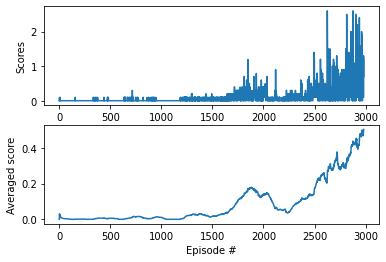

In [41]:
# plot the scores
fig = plt.figure();
fig, (ax2, ax1) = plt.subplots(2, 1);

new_window = deque(maxlen=100)  
average_scores = []
for i in range(len(scores)):
    new_window.append(scores[i])
    average_scores.append(np.mean(new_window))
ax1.plot(np.arange(1,1+len(average_scores)), average_scores);
ax1.set(xlabel='Episode #', ylabel='Averaged score');

ax2.plot(np.arange(1,1+len(scores)), scores);
ax2.set(xlabel='Episode #', ylabel='Scores');


# TESTING
### 5. Agent in action!
Let's see how the trained agents play!
We'll load the previously trained model: checkpoint.pth .

Note: this step can be run apart from the previous TRAINING steps; the file contains a pre-trained model.


In [1]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name='Tennis_Windows_x86_64/Tennis.exe')

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [2]:
from cc_ddpg_agent import Agents
import torch 

agents = Agents(num_agents, state_size, action_size, 4109)
agents.load_to_cpu(path='backup_actor_local.pth')

In [3]:
import time

env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
score = np.zeros(num_agents)                           # initialize the score (for each agent)

max_t = 1000
for t in range(max_t):
    actions     = agents.act(states)                   # select an action (for each agent)
    env_info    = env.step(actions)[brain_name]        # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards     = env_info.rewards                     # get reward (for each agent)
    dones       = env_info.local_done                  # see if episode finished
    states = next_states                               # roll over states to next time step
    score += env_info.rewards                          # update the score (for each agent)
    
    time.sleep(0)
    if np.any(dones):                                  # exit loop if episode finished
        break

episode_score = np.max(score)                         # score averaged over agents    
print('\rEpisode  Maximum Score (between agents): {:.2f}'.format(episode_score), end="")


Episode  Maximum Score (between agents): 0.50

In [4]:
env.close()